# Big Mart Sales Problem

## Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print("import complete")

import complete


#### Loading the datasets

In [2]:
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')

### Exploring the datasets [ Exploratory Data Analysis ]

In [3]:
# checking the train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# checking the test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# checking shapes of train and test data
print(train.shape,'\n',test.shape)

(8523, 12) 
 (5681, 11)


In [6]:
#check info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# There are four float variables, one integer variable and 7 categorical variables in training dataset.    

- Categorical variables :
    - Item_Identifier
    - Item_Fat_Content
    - Item_Type
    - Outlet_Identifier
    - Outlet_Size
    - Outlet_Location_Type
    - Outlet_Type
    
- Numerical variables :
    - Item_Weight
    - Item_Visibility
    - Item_MRP
    - Outlet_Establishment_Year
    - Item_Outlet_Sales

In [8]:
# checking missing values in training dataset
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# checking missing values in training dataset
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- Train dataset
  - 1463 missing values in Item_weight which is a numerical variable
  - 2410 missing values in Outlet_Size which is categorical in nature
  
- Test dataset
  - 976 missing values in 1463 missing values in Item_weight which is a numerical variable
  - 1606 missing values in Outlet_Size which is categorical in nature

In [10]:
# will be checking the statistical information of the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
# checking correlation of variables
cor=train.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
# checking the correlation of numerical variables wrt sales
cor.Item_Outlet_Sales.sort_values(ascending=False).drop(['Item_Outlet_Sales'])

Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Item_MRP is the highest correlated feature to the sales of products

In [13]:
# will be checking the unique values in categorical features

In [14]:
train.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [15]:
test.Item_Identifier.unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

looks like item identifer item as all unique values

In [16]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [18]:
"""
since fat content has two main values low fat and regular represented using
different values i.e. 'low fat', 'LF', 'reg' will be replacing them with only two unique values
Low Fat and Regular
"""

"\nsince fat content has two main values low fat and regular represented using\ndifferent values i.e. 'low fat', 'LF', 'reg' will be replacing them with only two unique values\nLow Fat and Regular\n"

In [19]:
train.replace({'Item_Fat_Content' : {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
test.replace({'Item_Fat_Content' : {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [20]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Replaced the values into two different categories

In [22]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [23]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [24]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

there are some missing values 

In [25]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [26]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### Visualisation and analysis

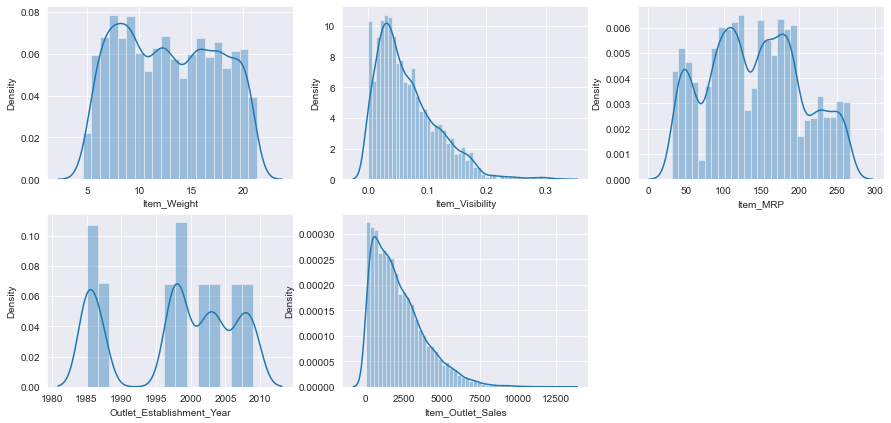

In [27]:
# checking ditribution plots for numerical vriables
di = train.select_dtypes(exclude="object")
plt.figure(figsize=(15,7))
plot = 1
for i in di.columns:
    plt.subplot(2,3,plot)
    sns.distplot(di[i])
    plot +=1
plt.show()

None of the variable is normally distributed and there is skewness in Item_Visibility and Item_Outlet_Sales

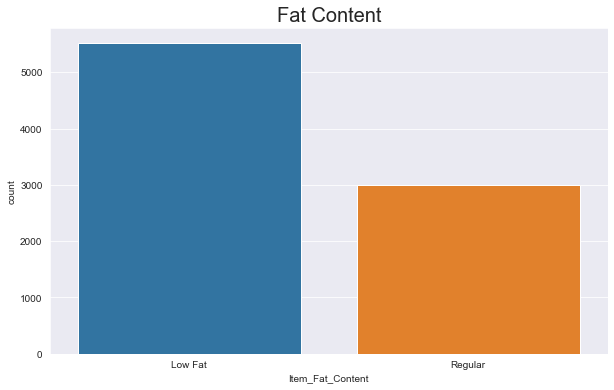

In [28]:
# Plotting fat content variable
plt.figure(figsize=(10,6))
plt.title("Fat Content",fontsize=20)
sns.countplot('Item_Fat_Content',data=train)
plt.show()

Major products have low fat content 

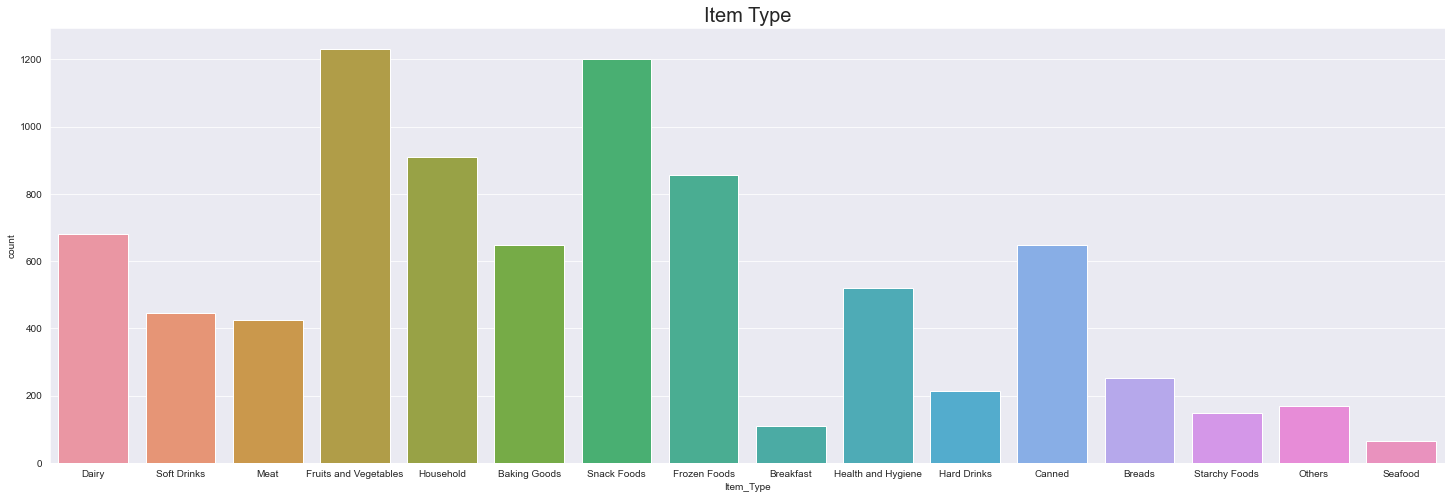

In [29]:
# Plotting Item Type content variable
plt.figure(figsize=(25,8))
plt.title("Item Type",fontsize=20)
sns.countplot('Item_Type',data=train)
plt.show()

As we can see from the above plots that maximum products are either of type fruits and vegetables or snack foods seafood are less in number compared to other item types

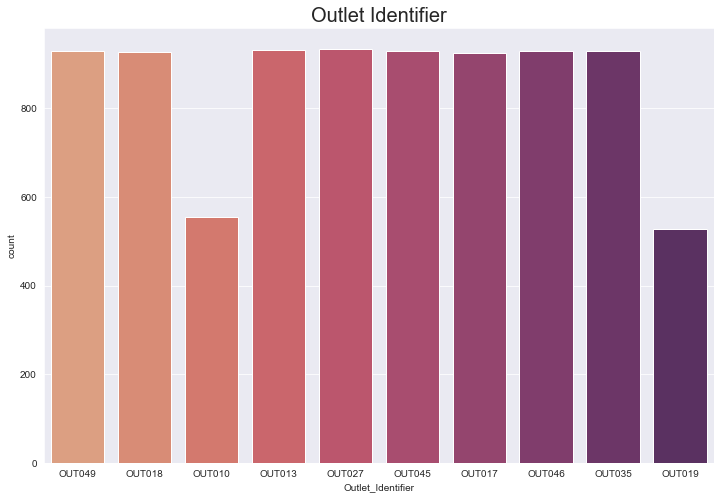

In [30]:
# Plotting Outlet Identifier variable
plt.figure(figsize=(12,8))
plt.title("Outlet Identifier",fontsize=20)
sns.countplot('Outlet_Identifier',data=train,palette='flare')
plt.show()

There is almost an equal distribution of outlets only OUT10 and OUT19 are less in number as compared to others.   

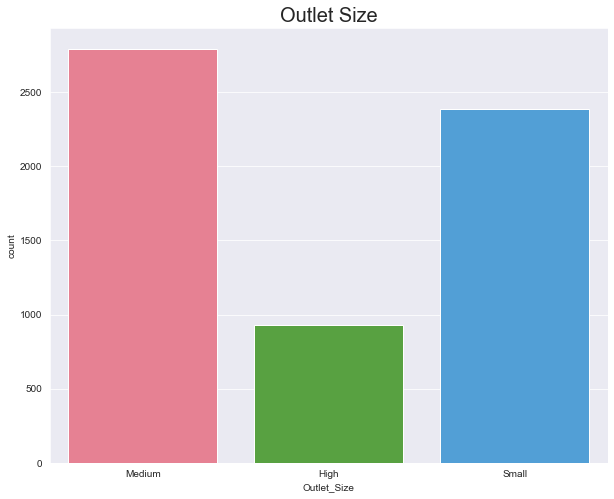

In [31]:
# Plotting Outlet Size 
plt.figure(figsize=(10,8))
plt.title("Outlet Size",fontsize=20)
sns.countplot('Outlet_Size',data=train,palette='husl')
plt.show()

- There are mojorly Medium sized outlets 
- Large outlets are very less in number

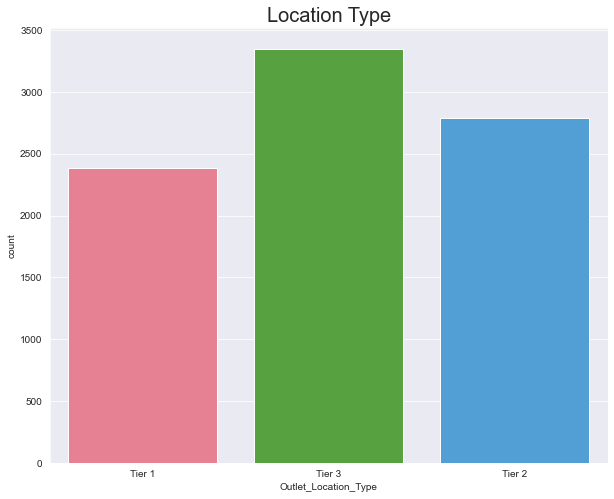

In [32]:
# Plotting Outlet Location Type 
plt.figure(figsize=(10,8))
plt.title("Location Type",fontsize=20)
sns.countplot('Outlet_Location_Type',data=train,palette='husl')
plt.show()

- Most of the outlets are located in Tier 3 locations
- Whereas Tier 1 and Tier 2 cities have almost same number of outlets

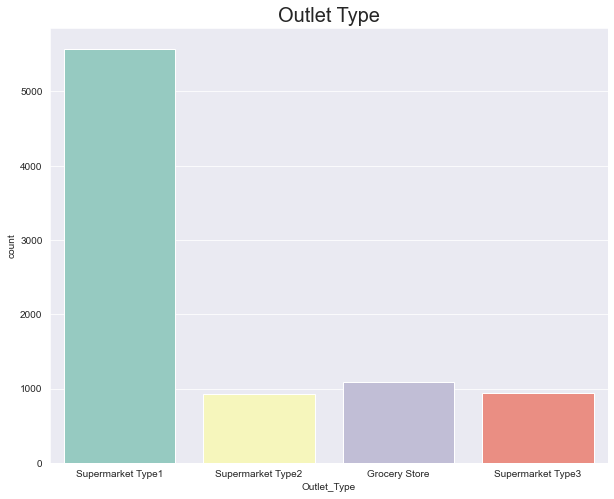

In [33]:
# Plotting Outlet Type
plt.figure(figsize=(10,8))
plt.title("Outlet Type",fontsize=20)
sns.countplot('Outlet_Type',data=train,palette='Set3')
plt.show()

- Majorly outlets are of type Supermarket1
- Grocery store type outlets are less in number

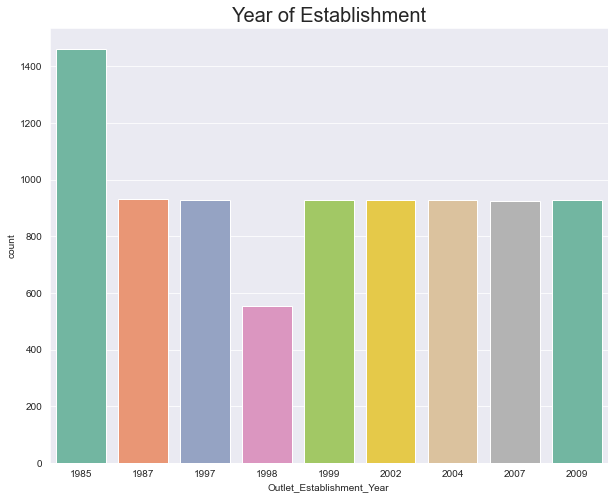

In [34]:
# plotting the year of establishment
plt.figure(figsize=(10,8))
plt.title("Year of Establishment",fontsize=20)
sns.countplot('Outlet_Establishment_Year',data=train,palette='Set2')
plt.show()

- Majorly Outlets were established in year of 1985
- The least no. of outlets were established in 1998

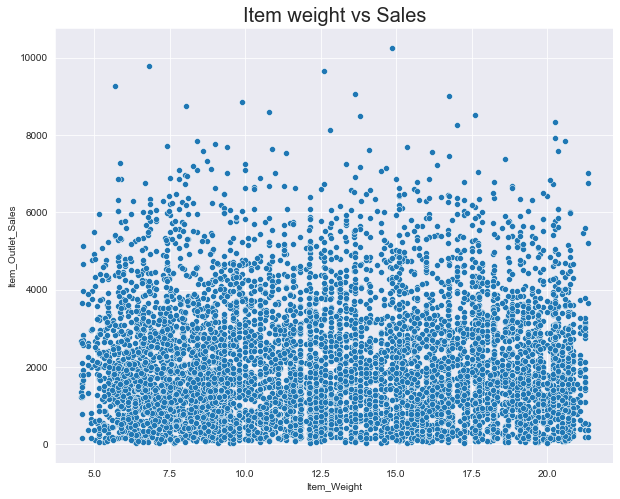

In [35]:
# plotting relationship between sales and weight of items 
plt.figure(figsize=(10,8))
plt.title("Item weight vs Sales",fontsize=20)
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)
plt.show()

- The plot does give any clear relation between the sales and weight of an item.
- Cannot strongly say that weight will result in good amount of sales

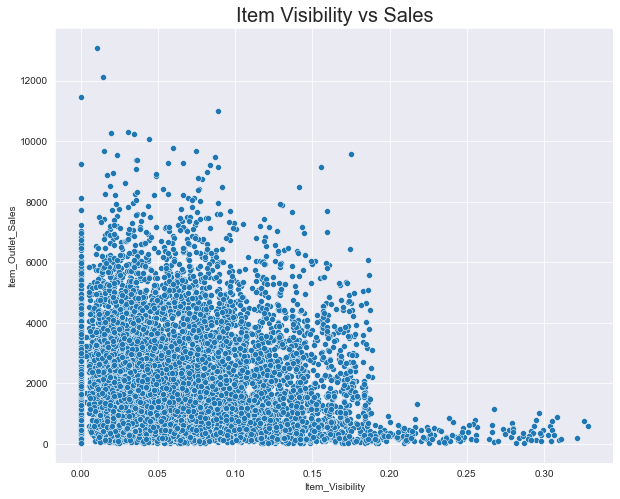

In [36]:
# plotting relationship between sales and visibility of items 
plt.figure(figsize=(10,8))
plt.title("Item Visibility vs Sales",fontsize=20)
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

- The plot does give any clear relation between the sales and weight of an item.
- Cannot strongly say that weight will result in good amount of sales

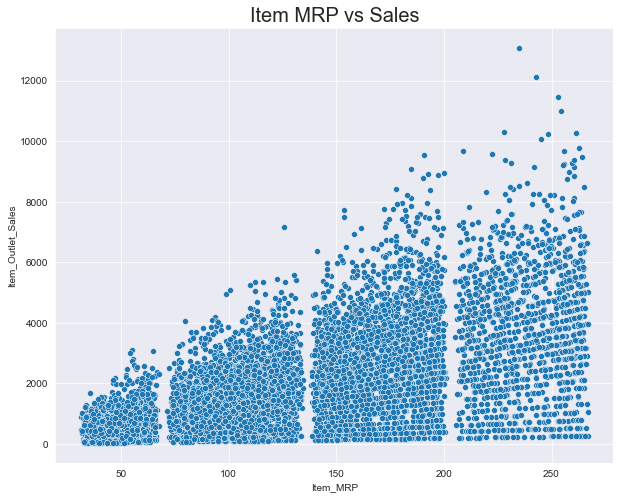

In [37]:
# plotting relationship between sales and MRP of items 
plt.figure(figsize=(10,8))
plt.title("Item MRP vs Sales",fontsize=20)
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

- From an insight from the above plot can see somewhat linear relationship between the variables 
- So can say that roughly that with increase in MRP the sales of products will increase

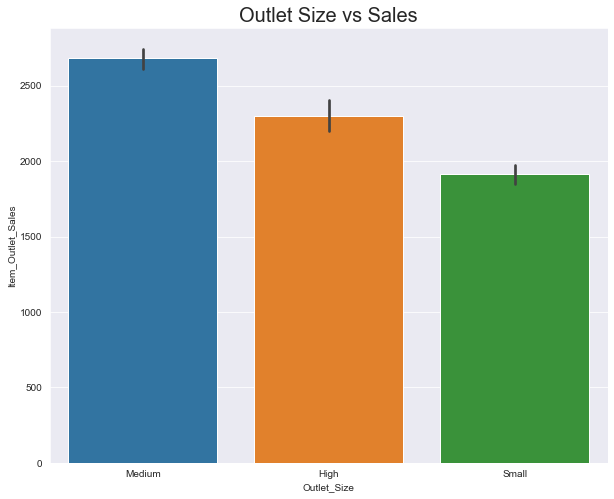

In [38]:
# plotting relationship between sales and outlet size of items 
plt.figure(figsize=(10,8))
plt.title("Outlet Size vs Sales",fontsize=20)
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)
plt.show()

- Major Sales come from medium sized outlets

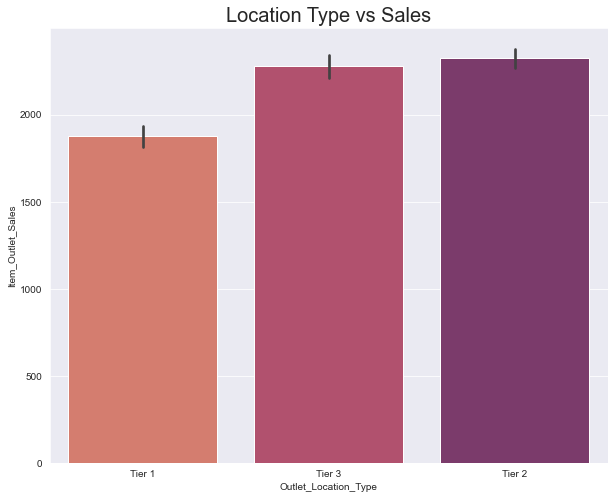

In [39]:
# plotting relationship between sales and outlet location 
plt.figure(figsize=(10,8))
plt.title("Location Type vs Sales",fontsize=20)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='flare')
plt.show()

- Highest sales come from Tier 2 cities
- Tier 2 and Tier 3 cities have almost equal sales

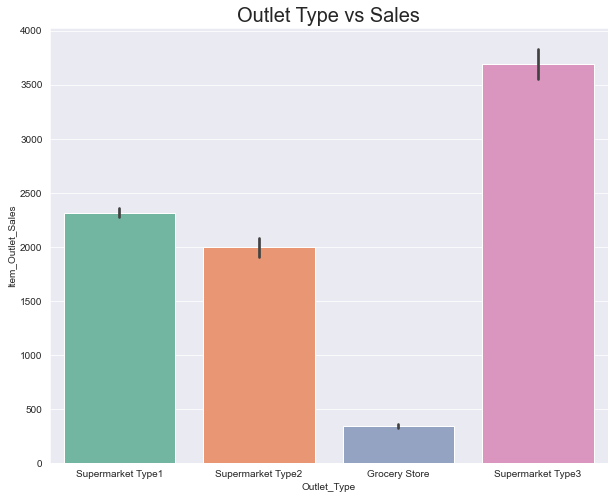

In [40]:
# plotting relationship between sales and outlet type
plt.figure(figsize=(10,8))
plt.title("Outlet Type vs Sales",fontsize=20)
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,palette='Set2')
plt.show()

- Supermarket 3 type of outlets give more amount of sales 
- Grocery stores contribute least in sales of items

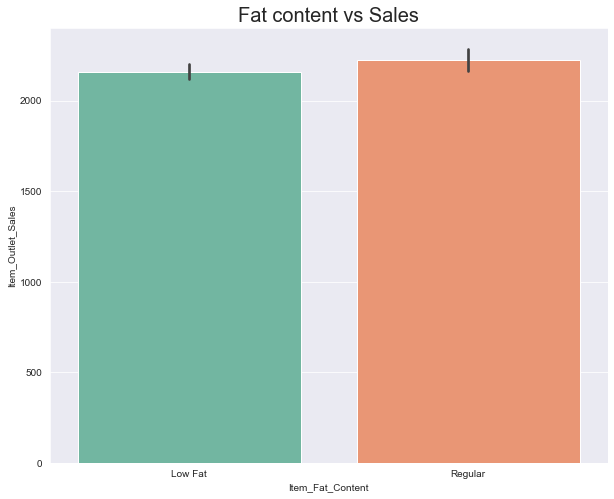

In [41]:
# plotting relationship between sales and fat content in items
plt.figure(figsize=(10,8))
plt.title("Fat content vs Sales",fontsize=20)
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,palette='Set2')
plt.show()

- Sales of an item is not that much affected by the fat content
- Although there is slightly higher sales of regular fat content items

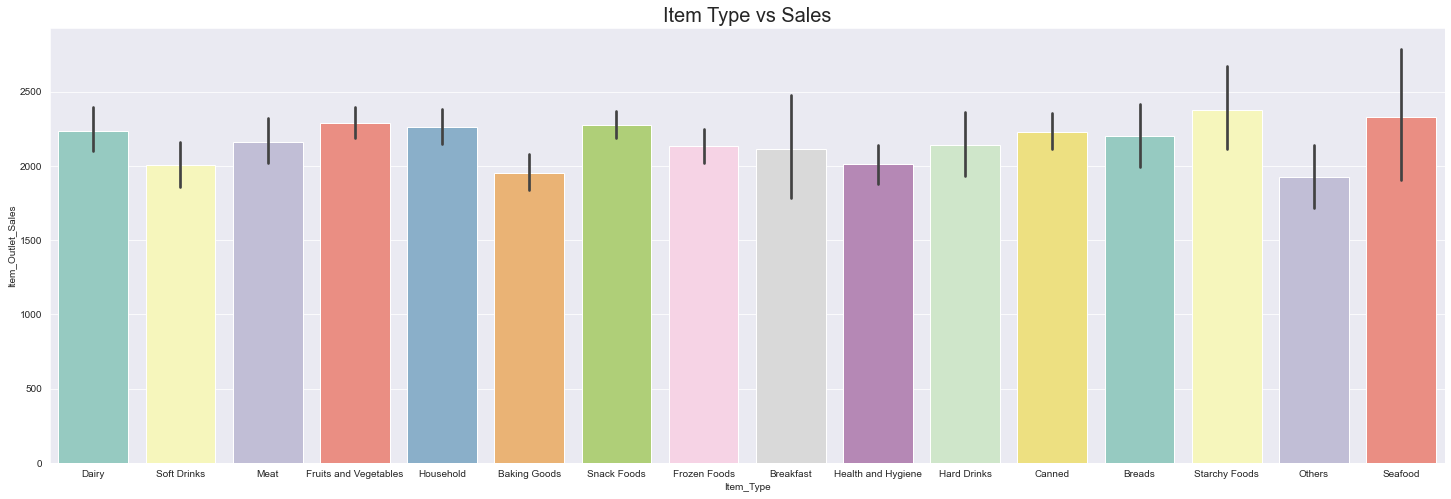

In [42]:
# plotting relationship between sales and type of items
plt.figure(figsize=(25,8))
plt.title("Item Type vs Sales",fontsize=20)
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='Set3')
plt.show()

- There is not much difference in the contribution to sales by item types but starchy foods contribute more than all other products.

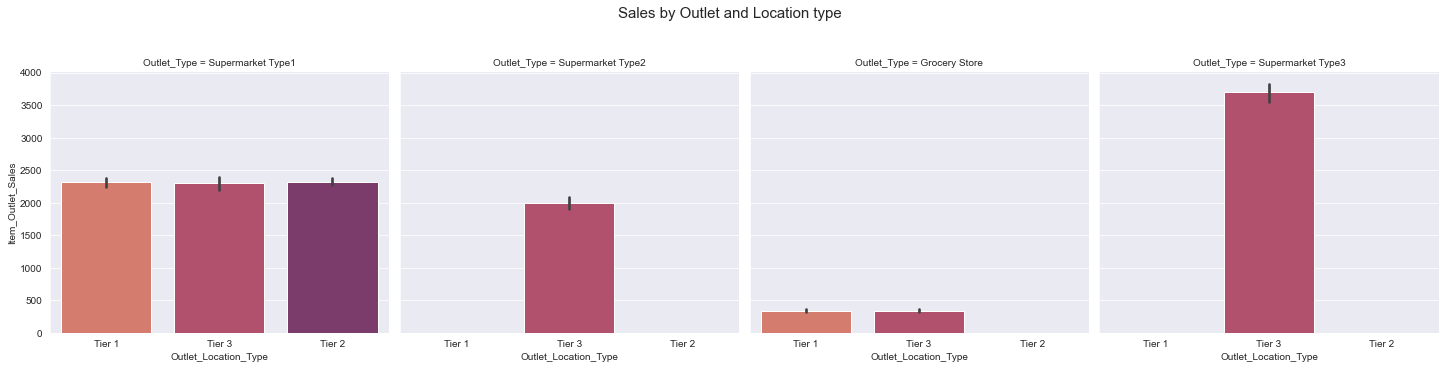

In [43]:
p = sns.factorplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',col='Outlet_Type',data=train,kind='bar',palette='flare')
plt.subplots_adjust(top=0.8)
p.fig.suptitle("Sales by Outlet and Location type",fontsize=15)
plt.show()

- Supermarket Type 1
  - sales are equal for all the location types
- Supermarket Type 2
  - sales are higher for tier 3 locations
- Supermarket Type 3
  - sales majorly come from tier 3 locations
- Grocery Store
  - major sales are from tier 1 and 3 locations tier 2 lacks in giving good sales
  
- Major sales come from Supermarket type 3 and least from grocery stores

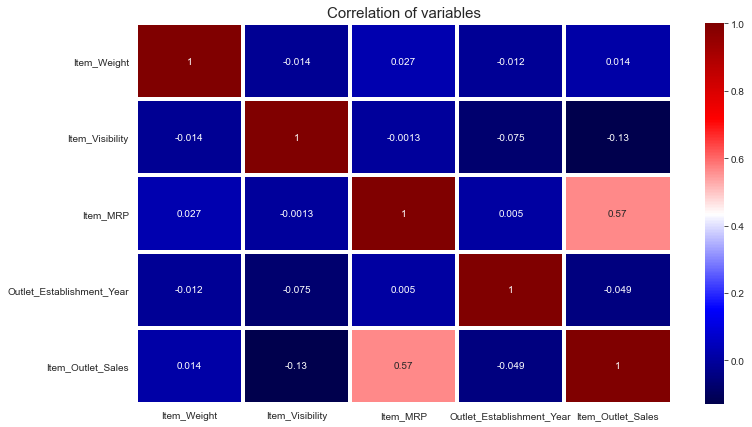

In [44]:
#plotting Correlation matrix 
plt.figure(figsize=(12,7))
plt.title("Correlation of variables",fontsize=15)
sns.heatmap(cor,annot=True,linewidth = 3, linecolor='white',cmap='seismic')
plt.show()

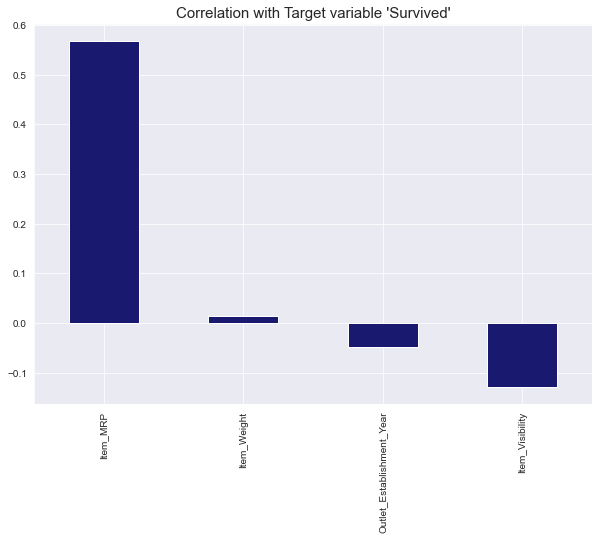

In [45]:
#correlation with target variable
plt.title("Correlation with Target variable 'Survived'",fontsize=15)
cor.Item_Outlet_Sales.sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',figsize=(10,7),color='midnightblue')
plt.show()

- Mrp of the items is highly corelated with sales of products in comparision to other features
- Weights of the items is least correlated feature

### Data Cleaning and Preparation

In [46]:
#checking the dataset for missing values

<AxesSubplot:>

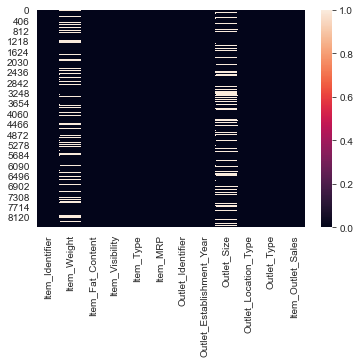

In [47]:
sns.heatmap(train.isnull())

Can see some null values in item weight and outlet size features

In [48]:
#checking missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- Item weight and outlet size has missing values
- since item weight is numerical feature will be filling it with mean 
- whereas will be filling outlet size with mode since it is a categorical features

In [50]:
# filling item weight with mean
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [51]:
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

In [52]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
# handling missing values in outlet size 
train.Outlet_Size = train.Outlet_Size.map({"Small":1,"Medium":2,"High":3})
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [54]:
test.Outlet_Size = test.Outlet_Size.map({"Small":1,"Medium":2,"High":3})
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode()[0])

In [55]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Detecting and removal of outliers

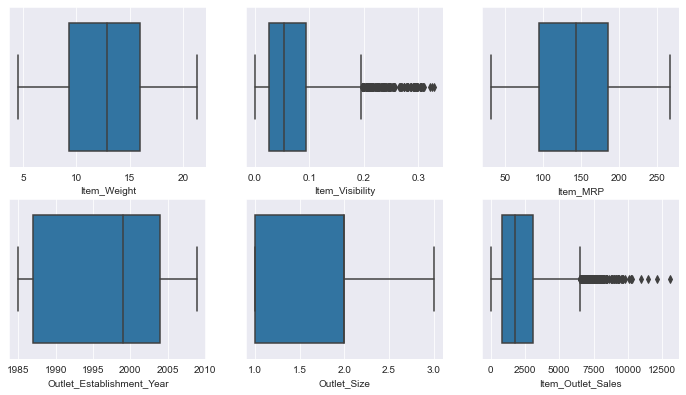

In [56]:
### visualising outliers with help of boxplots
df = train.select_dtypes(exclude="object")
plot = 1
plt.figure(figsize=(12,10))
for i in df.columns:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plot+=1
plt.show()

From above we can see that there are outliers in item_visibility, and item_outlet sales

In [57]:
# removal of outliers
def detect_outliers(df,features):
    
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

In [58]:
remove=detect_outliers(train,['Item_Visibility'])

In [59]:
train = train.drop(remove,axis=0).reset_index(drop=True)
train.shape

(8379, 12)

In [60]:
remove1 = detect_outliers(test,['Item_Visibility'])

In [61]:
test = test.drop(remove1,axis=0).reset_index(drop=True)
test.shape

(5568, 11)

### Checking skewness

In [62]:
train.skew()

Item_Weight                  0.089860
Item_Visibility              0.738153
Item_MRP                     0.129015
Outlet_Establishment_Year   -0.414811
Outlet_Size                  0.081516
Item_Outlet_Sales            1.170947
dtype: float64

Item_Visibility and Item_Outlet_Sales have skewness higher than 0.5 need to treat them

In [63]:
train.Item_Visibility = np.log(train.Item_Visibility+1)

In [64]:
train.skew()

Item_Weight                  0.089860
Item_Visibility              0.662280
Item_MRP                     0.129015
Outlet_Establishment_Year   -0.414811
Outlet_Size                  0.081516
Item_Outlet_Sales            1.170947
dtype: float64

In [65]:
test.skew()

Item_Weight                  0.141629
Item_Visibility              0.721386
Item_MRP                     0.131805
Outlet_Establishment_Year   -0.415829
Outlet_Size                  0.082182
dtype: float64

In [66]:
test.Item_Visibility = np.log(train.Item_Visibility+1)

In [67]:
test.skew()

Item_Weight                  0.141629
Item_Visibility              0.592353
Item_MRP                     0.131805
Outlet_Establishment_Year   -0.415829
Outlet_Size                  0.082182
dtype: float64

Treated skewness in the datasets

### Feature Engineering

Since Outlet_Establishment_Year does not provide any specific information will be creating a new feature instead Outlet_Age by calculating age for an outlet


In [68]:
train['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021-x)

In [69]:
test['Outlet_Age'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021-x)

In [70]:
# Will be dropping some irrelevant features
# i.e. dropping columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier
train.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

- will be label encoding :
    - Item_Fat_Content
    - Outlet_Location_Type
    - Outlet_Type
- will be creating dummy columns for:
    - Item_Type

#### Encoding

In [71]:
# label encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train.Item_Fat_Content = LE.fit_transform(train.Item_Fat_Content)
train.Outlet_Location_Type = LE.fit_transform(train.Outlet_Location_Type)
train.Outlet_Type = LE.fit_transform(train.Outlet_Type)

test.Item_Fat_Content = LE.fit_transform(test.Item_Fat_Content)
test.Outlet_Location_Type = LE.fit_transform(test.Outlet_Location_Type)
test.Outlet_Type = LE.fit_transform(test.Outlet_Type)

# dummy variable encoding

tr_dummy = pd.get_dummies(train['Item_Type'])
te_dummy = pd.get_dummies(test['Item_Type'])

# concatinating dummy columns

train = pd.concat([train,tr_dummy],axis=1)
test = pd.concat([test,te_dummy],axis=1)

In [72]:
train.drop(['Item_Type'],axis=1,inplace=True)

In [73]:
test.drop(['Item_Type'],axis=1,inplace=True)

### Splitting into target and feature variables

In [74]:
X = train.drop(['Item_Outlet_Sales'],axis=1)
y = train['Item_Outlet_Sales']

In [75]:
X.shape, y.shape

((8379, 24), (8379,))

In [76]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.015920,249.8092,2.0,0,1,22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019095,48.2692,2.0,2,2,12,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016621,141.6180,2.0,0,1,22,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,2.0,2,0,23,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,3.0,2,1,34,0,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
y[0:10]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
5     556.6088
6     343.5528
7    4022.7636
8    1076.5986
9    4710.5350
Name: Item_Outlet_Sales, dtype: float64

### Standardisation

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[-0.84040636, -0.73656349, -1.03578635, ..., -0.40505969,
        -0.23513756, -0.13176797],
       [-1.63724716,  1.35765622, -0.96157034, ..., -0.40505969,
         4.25282969, -0.13176797],
       [ 1.0927577 , -0.73656349, -1.01939325, ..., -0.40505969,
        -0.23513756, -0.13176797],
       ...,
       [-0.53392913, -0.73656349, -0.59955024, ..., -0.40505969,
        -0.23513756, -0.13176797],
       [-1.33312745,  1.35765622,  1.76182757, ...,  2.46877194,
        -0.23513756, -0.13176797],
       [ 0.45622807, -0.73656349, -0.38170619, ..., -0.40505969,
         4.25282969, -0.13176797]])

In [79]:
x=pd.DataFrame(scaled, columns=X.columns)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,-0.840406,-0.736563,-1.035786,1.747925,0.274315,-1.379820,-0.281779,-0.125905,-0.285378,-0.174644,...,-0.410434,-0.160725,-0.256171,-0.346248,-0.229142,-0.142605,-0.085636,-0.40506,-0.235138,-0.131768
1,-1.637247,1.357656,-0.961570,-1.488702,0.274315,1.092966,0.988274,-1.323226,-0.285378,-0.174644,...,-0.410434,-0.160725,-0.256171,-0.346248,-0.229142,-0.142605,-0.085636,-0.40506,4.252830,-0.131768
2,1.092758,-0.736563,-1.019393,0.010431,0.274315,-1.379820,-0.281779,-0.125905,-0.285378,-0.174644,...,-0.410434,-0.160725,-0.256171,-0.346248,4.364110,-0.142605,-0.085636,-0.40506,-0.235138,-0.131768
3,1.493536,1.357656,-1.407935,0.660470,0.274315,1.092966,-1.551833,-0.006173,-0.285378,-0.174644,...,2.436444,-0.160725,-0.256171,-0.346248,-0.229142,-0.142605,-0.085636,-0.40506,-0.235138,-0.131768
4,-0.927634,-0.736563,-1.407935,-1.398894,1.941090,1.092966,-0.281779,1.310880,-0.285378,-0.174644,...,-0.410434,-0.160725,-0.256171,2.888103,-0.229142,-0.142605,-0.085636,-0.40506,-0.235138,-0.131768


In [80]:
#### Train/Test Split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=2)

#### feature selection

In [96]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(xtrain,ytrain)
mutual_info

array([5.24319801e-02, 1.88264371e-02, 3.58916269e-02, 6.44393249e-01,
       8.37015599e-03, 3.19678509e-02, 2.48153586e-01, 1.65766595e-01,
       0.00000000e+00, 0.00000000e+00, 3.85602423e-03, 5.06966908e-03,
       1.16929189e-02, 0.00000000e+00, 1.17541096e-02, 5.14731895e-04,
       0.00000000e+00, 1.31776590e-02, 2.87007996e-03, 0.00000000e+00,
       0.00000000e+00, 6.65360955e-03, 7.59137195e-03, 0.00000000e+00])

In [98]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

Item_MRP                 0.644393
Outlet_Type              0.248154
Outlet_Age               0.165767
Item_Weight              0.052432
Item_Visibility          0.035892
Outlet_Location_Type     0.031968
Item_Fat_Content         0.018826
Household                0.013178
Fruits and Vegetables    0.011754
Dairy                    0.011693
Outlet_Size              0.008370
Soft Drinks              0.007591
Snack Foods              0.006654
Canned                   0.005070
Breakfast                0.003856
Meat                     0.002870
Hard Drinks              0.000515
Breads                   0.000000
Baking Goods             0.000000
Frozen Foods             0.000000
Health and Hygiene       0.000000
Others                   0.000000
Seafood                  0.000000
Starchy Foods            0.000000
dtype: float64

<AxesSubplot:>

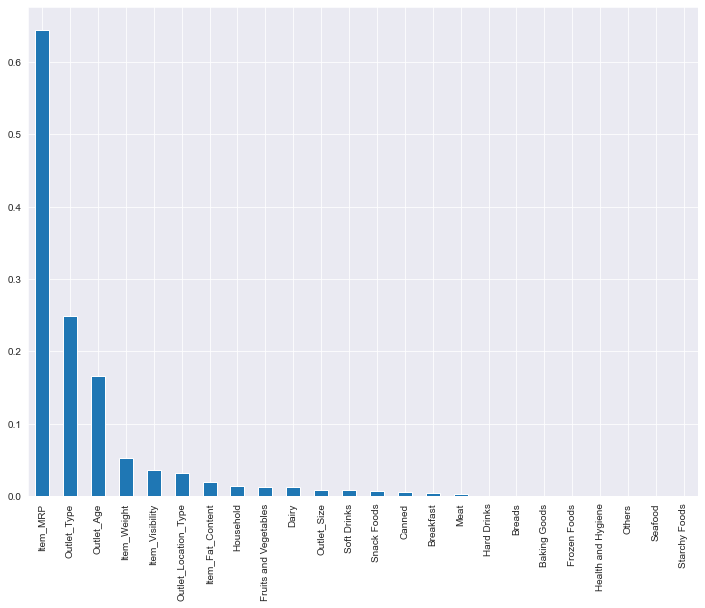

In [101]:
mutual_info.sort_values(ascending=False).plot(kind='bar',figsize=(12,9))

In [102]:
from sklearn.feature_selection import SelectPercentile

#selecting top 20 percentile
selected_cols = SelectPercentile(mutual_info_regression,20)
selected_cols.fit(xtrain,ytrain)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x11b68d700>)

In [103]:
selected_cols.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [104]:
xtrain.columns[selected_cols.get_support()]

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Type',
       'Outlet_Age'],
      dtype='object')

In [120]:
x_train = selected_cols.transform(xtrain)
x_test = selected_cols.transform(xtest)

### Model Building

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [82]:
# intialising all the models
LR = LinearRegression()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [83]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

In [85]:
# loop for model training, prediction and evaluation
for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain,ytrain)
    print("\n",model)
    pred = model.predict(xtest)
    
    print('R2_score',r2_score(ytest,pred))
    print('Cross val score',cross_val_score(model,X,y,scoring="r2",cv=5).mean())
    print('MAE',mean_absolute_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)),"\n")

***** Linear Regression  *****

 LinearRegression()
R2_score 0.49878189882998625
Cross val score 0.4989986496798968
MAE 906.871863849892
RMSE 1203.329088329634 

***** K Nearest Neighbor Regressor  *****

 KNeighborsRegressor()
R2_score 0.45052884647276714
Cross val score 0.46000168218028037
MAE 899.7327231026253
RMSE 1259.9215098527743 

***** Support Vector Regressor  *****

 SVR()
R2_score 0.18601332519281855
Cross val score 0.1906864953328519
MAE 1126.5740499718088
RMSE 1533.4855549652705 

***** Decision Tree Regressor  *****

 DecisionTreeRegressor()
R2_score 0.2113190297841211
Cross val score 0.15809298977003378
MAE 1061.7714405727922
RMSE 1509.4603955005416 

***** Random forest Regressor  *****

 RandomForestRegressor()
R2_score 0.536983465933438
Cross val score 0.5411225818331692
MAE 819.074874699284
RMSE 1156.5629920479212 

***** AdaBoost Regressor  *****

 AdaBoostRegressor()
R2_score 0.4077602974142581
Cross val score 0.4800175095326725
MAE 1057.061825131971
RMSE 1308.036

Since, Gradient boost is forming best here having the highest r2_score of 0.5764 and highest cross val score 0.5864 with least mean absolute and root mean squared error of 783.56 and 1106.19 respectively, will be further tuning gradient boost with best parameters

### Hyperparameter tuning

In [87]:
# grid parameters to search
grid_param = {'learning_rate':[0.01,0.05,0.1],
              'max_depth':np.arange(2,12),
              'max_features':['auto', 'sqrt', 'log2'],
              'n_estimators':np.arange(50,200,50),
              'min_samples_leaf':np.arange(30,71,10),
               }
# using randomized search cv for grid search to find best parameters 
grid_search = RandomizedSearchCV(GB,grid_param,cv=5,verbose=5)
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=70, n_estimators=100;, score=0.572 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=70, n_estimators=100;, score=0.574 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=70, n_estimators=100;, score=0.588 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=70, n_estimators=100;, score=0.580 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=70, n_estimators=100;, score=0.565 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=50, n_estimators=50;, score=0.577 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_features=sqrt, min_samples_leaf=50, n_estimators=50;, score=0.581 total time

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([30, 40, 50, 60, 70]),
                                        'n_estimators': array([ 50, 100, 150])},
                   verbose=5)

In [88]:
# best parameters 
grid_search.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 30,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.05}

#### Tuning the model

In [90]:
# tuning the model with best parameters
tuned_model = GradientBoostingRegressor(n_estimators=150,max_features='auto',max_depth=5,
                                        learning_rate=0.05,min_samples_leaf=30)
tuned_model.fit(xtrain,ytrain)
tuned_pred = tuned_model.predict(xtest)
print('R2_score',r2_score(ytest,tuned_pred))

R2_score 0.5772116864641207


#### Predicting the sales for test dataset

In [91]:
prediction = tuned_model.predict(test)
prediction

array([1673.37884938, 1502.97285173,  521.4433293 , ..., 1786.89902595,
       3825.88204598, 1319.47089744])

In [93]:
df=pd.DataFrame({'Item_Outlet_Sales':prediction})
predicted_sales = pd.concat([test,df],axis=1)
predicted_sales

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Baking Goods,Breads,...,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_Outlet_Sales
0,20.750000,0,0.015795,107.8622,2.0,0,1,22,0,0,...,0,0,0,0,0,0,1,0,0,1673.378849
1,8.300000,1,0.018915,87.3198,2.0,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,1502.972852
2,14.600000,0,0.016485,241.7538,2.0,2,0,23,0,0,...,0,0,0,0,1,0,0,0,0,521.443329
3,7.315000,0,0.000000,155.0340,2.0,1,1,14,0,0,...,0,0,0,0,0,0,1,0,0,2507.555723
4,12.695633,1,0.000000,234.2300,2.0,2,3,36,0,0,...,0,0,0,0,0,0,0,0,0,6974.700855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,1,0.026496,141.3154,1.0,0,1,24,0,0,...,0,0,0,0,0,0,1,0,0,2180.079373
5564,7.600000,1,0.100624,169.1448,2.0,2,2,12,0,0,...,0,0,0,0,0,0,0,0,1,2588.303168
5565,10.000000,0,0.085214,118.7440,2.0,1,1,19,0,0,...,0,1,0,0,0,0,0,0,0,1786.899026
5566,15.300000,1,0.039570,214.6218,2.0,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,3825.882046


### Saving the model

In [94]:
import joblib 
joblib.dump(tuned_model,"Big_Mart_model.pkl")

['Big_Mart_model.pkl']